In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import copy
import math

source_dir = "images/"
save_dir = "save/"

In [3]:
def show_image(image, title=None, save_name=None):
    fig = plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    if save_name is not None:
        plt.savefig(save_dir + save_name)
    plt.show()

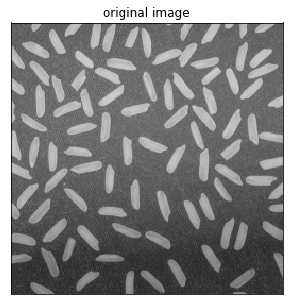

In [4]:
source_image = cv2.imread(source_dir + "rice.png")
show_image(source_image, "original image")

In [5]:
def high_boost(image, A=3):
    kernel = [[0, -A, 0],
         [-A, 4*A + 1, -A],
         [0, -A, 0]]
    kernel = np.asarray(kernel)    
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

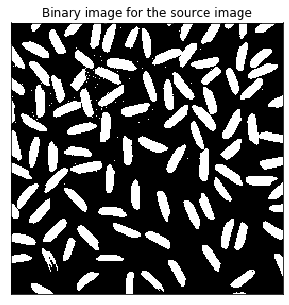

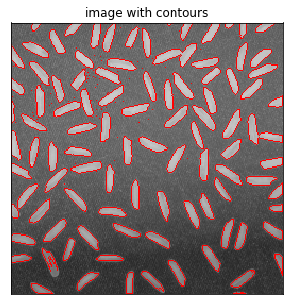

In [85]:
image_with_contours = np.copy(source_image)
grayscale = cv2.cvtColor(source_image, cv2.COLOR_BGR2GRAY)
# smoothed = cv2.GaussianBlur(grayscale, (3, 5), 0.3)
smoothed = cv2.bilateralFilter(grayscale, -1, 10, 10)
_, thresh = cv2.threshold(smoothed, 120, 255, cv2.THRESH_BINARY)
show_image(thresh, "Binary image for the source image")
contours, hierarchi = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image_with_contours, contours, -1, (0,0,255), 1)
show_image(image_with_contours, "image with contours", "5-image_with_contours")

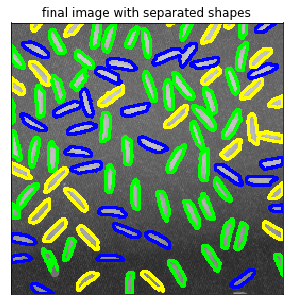

In [84]:
image_closed_contours = np.copy(source_image)
image_with_rectangles = copy.deepcopy(source_image)
image_with_colored_contours = copy.deepcopy(source_image)
closeness_rate = 4
closed_contours = []
for i, contour in enumerate(contours):
    if cv2.contourArea(contour) > 10:
        closed_contours.append(contour)
        x0, y0, w, y = cv2.boundingRect(contour)
        cv2.rectangle(image_with_rectangles, (x0, y0), (x0 + w, y0 + y), (0, 255, 0), 1)
        if y > w + closeness_rate: 
            cv2.drawContours(image_with_colored_contours, 
                             contours, 
                             i, (0, 255, 0), 2)
        if y < w - closeness_rate: 
            cv2.drawContours(image_with_colored_contours, 
                             contours, 
                             i, (255, 0, 0), 2)
        
        if w-closeness_rate <= y <= w + closeness_rate: 
            cv2.drawContours(image_with_colored_contours, 
                             contours, 
                             i, (0, 255, 255), 2)
        
            
# cv2.drawContours(image_closed_contours, closed_contours, -1, (0, 255,0), 1)
# show_image(image_with_rectangles)
show_image(image_with_colored_contours, "final image with separated shapes", "final_image_with_separated_shapes")